# Module 6


https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff

The **bias** error is an error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).

The **variance** is an error from sensitivity to small fluctuations in the training set. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting).

# *

The center of the bullseye in our situation is the label or target – it predicts the value of your model – and each dot is a result that your model produced during training. 

You can see where you’ve got low bias/high variance (top right image), 

high bias/high variance (bottom right), 

and high bias/low variance (bottom left). 

Ideally – you guessed it – you want low bias and low variance (top left). 

Realistically though, there’s a balancing act happening here. 

Bias and variance both contribute to errors but what you’re ultimately going for is a minimized prediction error – not bias or variance specifically. This is the bias-variance tradeoff. 

# *

Bringing underfitting and overfitting back into the picture, 
underfitting is where you have low variance and high bias. 

These models are overly simple and they can’t really see the underlying patterns within the data. 

Overfitting is high variance and low bias (top right). These models are overly complex, and while they can detect patterns in training data, they aren’t accurate outside that training data. 
 


# Classification Metrics 



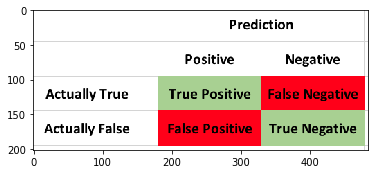

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('./images/Confusion.png')
imgplot = plt.imshow(img)

### True Positive: 
    Top left, In a prediction, these are the ones the model got right.
    
### True Negative: 
    In the lower right are also the ones the model got right. 
    
### False Negative: 
    This is one of two ways the model can blow it, a false negative is when the test result is actually true, but the prediction decided it was false.
    
### False Positive: 
    Lastly is the false positive in the lower left of my matrix, this one indicates that the model predicted a true when it should have predicted a false,

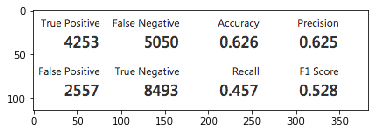

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('./images/Acc.png')
imgplot = plt.imshow(img)

### Accuracy 
    This is also called the misclassification error, or accuracy. it is the (False Positives + False Negatives) / sample size. So;

    (2557+5050) / (4253+5050+2557+8493) = 0.3737533  is the misclassification error.

    To get the Accuracy subtract from 1.
    1 – 0.3737533 = 0.6262467 (Accuracy)

### Precision 
    This is where confusion may start to kick in, the short version is; Precision is the proportion of positives that are classified correctly. In our case, True Positive / (True Positive + False Positive) so;
4253 / (4253 + 2557) = 0.6245228 (Precision)

### Recall 
    Is answering the question of how many are actually classified correctly. True Positive / (True Positive + False Negative)
4253 / (4253 + 5050) = 0.4571644 (Recall)

### F1 Score 
    The F1 Score is the harmonic mean of precision and recall, thus believed to be a good summary of the models ability to predict.
    
F1 = 2((Precision * Recall) / (Precision * Recall)) so;

2 * ((0.6245228 * 0.4571644)/(0.6245228 + 0.4571644)) = 0.5278968 (F1 Score)


### Cross-Entropy
#### MAE (L1)
#### MSE (L2)

https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#mae-l1

Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0.

# AUC ROC

AUC–ROC curve is the model selection metric for bi–multi class classification problem. ROC is a probability curve for different classes. ROC tells us how good the model is for distinguishing the given classes, in terms of the predicted probability.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [3]:
data_X, class_label = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)
trainX, testX, trainy, testy = train_test_split(data_X, class_label, test_size=0.3, random_state=1)

In [4]:
model = RandomForestClassifier()
model.fit(trainX, trainy)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [5]:
probs = model.predict_proba(testX)
probs = probs[:, 1]
auc = roc_auc_score(testy, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(testy, probs)

AUC: 0.95


In [6]:
probs

array([0.01, 0.99, 0.06, 0.03, 0.97, 0.83, 0.83, 0.9 , 0.75, 0.09, 0.81,
       0.95, 0.05, 0.75, 0.79, 0.06, 0.92, 0.13, 0.93, 0.01, 0.09, 0.21,
       0.8 , 0.83, 0.82, 0.84, 0.04, 0.72, 0.79, 0.88, 0.03, 0.12, 0.79,
       0.72, 0.74, 0.08, 0.02, 0.18, 0.92, 0.03, 0.  , 0.75, 0.01, 0.22,
       0.81, 0.07, 0.78, 0.95, 0.81, 0.02, 0.01, 0.77, 0.02, 0.05, 0.03,
       0.02, 0.79, 0.92, 0.12, 0.11, 0.53, 0.02, 0.95, 0.13, 0.14, 0.34,
       0.02, 0.34, 0.93, 0.6 , 0.91, 0.03, 0.86, 0.01, 0.04, 0.95, 0.01,
       0.98, 0.87, 0.83, 0.03, 0.07, 0.75, 0.94, 0.24, 0.79, 0.01, 0.02,
       0.49, 0.65, 0.9 , 0.86, 0.49, 0.06, 0.92, 0.21, 0.87, 0.84, 0.02,
       0.04, 0.8 , 0.  , 0.8 , 0.13, 0.02, 0.94, 0.02, 0.69, 0.62, 0.7 ,
       0.9 , 0.  , 0.77, 0.82, 0.96, 0.97, 0.91, 0.06, 0.88, 0.01, 0.01,
       0.02, 0.  , 0.92, 0.78, 0.06, 0.8 , 0.92, 0.87, 0.93, 0.81, 0.01,
       0.89, 0.88, 0.42, 0.83, 0.03, 0.9 , 0.93, 0.8 , 0.91, 0.79, 0.09,
       0.02, 0.87, 0.13, 0.87, 0.3 , 0.07, 0.79, 0.

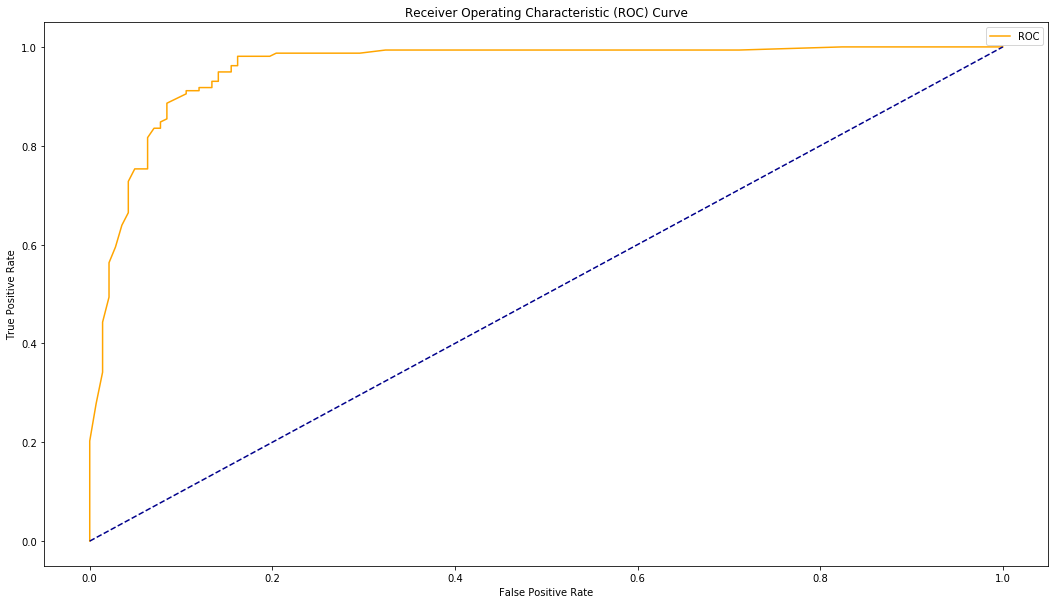

In [6]:
plt.figure(figsize=(18,10))
plot_roc_curve(fpr, tpr)

The area covered by the curve is the area between the orange line (ROC) and the axis. This area covered is AUC. The bigger the area covered, the better the machine learning models is at distinguishing the given classes. Ideal value for AUC is 1.

# Regression

In [ ]:
M